**STAT 301: Project Proposal** <br>
**Group 5** : Hannah Ban, Christine Sun, Eric Tang, Luqi Tang

**Introduction**

Existing academic scholarship attempts to account for the factors that predict adult income. A book by Messenger et al. (2007) addresses working time, including national trends in working hours among different countries. Chapter 4 examines the relationship between working hours and various age and gender cohorts. Their conclusion that age and gender are associated with working hours is illustrated through an international “gender gap” and a general reduction in working hours for individuals over 65 (Messenger et al., 2007). Similarly, a regression analysis conducted by Dunga (2017) based on a low-income, South African township concludes that marital status correlates with household income levels. <br>
From a sociological perspective, Clawson and Gerstel (2014) examine the ways that gender, class, and familial interactions affect workers’ working hours and their responses to unpredictable events that impact their work. They noted that gender plays a significant role inside and outside of the workplace—especially pertaining to resolving unpredictable circumstances and allocating work hours, while different socioeconomic classes exert varying degrees of control over their hours (Clawson & Gerstel, 2014). <br>
	Having deliberated previous literature surrounding adult income, it is relevant to  examine the possibility of projecting working hours based on multiple factors. We will analyse data collected in 1994 by Ronny Kohavi and Barry Becker for the United States Census Bureau database. The dataset represents a set of reasonable records where all observed individuals are older than 16 with an income greater than $100, working more than 0 hours per week, and each observed individual is representative of more than a single American adult. The response variable will be the number of hours worked per week. <br>

> The following is the link of data set: https://www.kaggle.com/datasets/uciml/adult-census-income

**Preliminary Results**

In [1]:
library(tidyverse)
library(repr)
library(digest)
library(infer)
# library(gridExtra)
library(broom)
# library(leaps)
library(GGally)
library(mltools)
library(cowplot)
# library(AER)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na




In [4]:
#reading the data
raw_adult_df<-read_csv("https://raw.githubusercontent.com/NingWang0123/stat201_project/main/adult.csv")

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): workclass, education, marital.status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education.num, capital.gain, capital.loss, hours.per.week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
#viewing the data
head(raw_adult_df)
tail(raw_adult_df)
nrow(raw_adult_df)
any(is.na(raw_adult_df))

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


[1] 32561

[1] FALSE

In [7]:
#removing the "?" observations
noques_adult <- raw_adult_df %>% filter(!grepl("\\?", workclass))
noques_adult <- noques_adult %>% filter(!grepl("\\?", education))
noques_adult <- noques_adult %>% filter(!grepl("\\?", marital.status))
noques_adult <- noques_adult %>% filter(!grepl("\\?", occupation))
noques_adult <- noques_adult %>% filter(!grepl("\\?", relationship))
noques_adult <- noques_adult %>% filter(!grepl("\\?", race))
noques_adult <- noques_adult %>% filter(!grepl("\\?", sex))
noques_adult <- noques_adult %>% filter(!grepl("\\?", native.country))
noques_adult <- noques_adult %>% filter(!grepl("\\?", income))
noques_adult$workclass <- as.factor(noques_adult$workclass)
noques_adult$education <- as.factor(noques_adult$education)
noques_adult$marital.status <- as.factor(noques_adult$marital.status)
noques_adult$occupation <- as.factor(noques_adult$occupation)
noques_adult$relationship <- as.factor(noques_adult$relationship)
noques_adult$race <- as.factor(noques_adult$race)
noques_adult$sex <- as.factor(noques_adult$sex)
noques_adult$native.country <- as.factor(noques_adult$native.country)
noques_adult$income <- as.factor(noques_adult$income)

In [8]:
head(noques_adult)
tail(noques_adult)
nrow(noques_adult)

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K


age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


[1] 30162

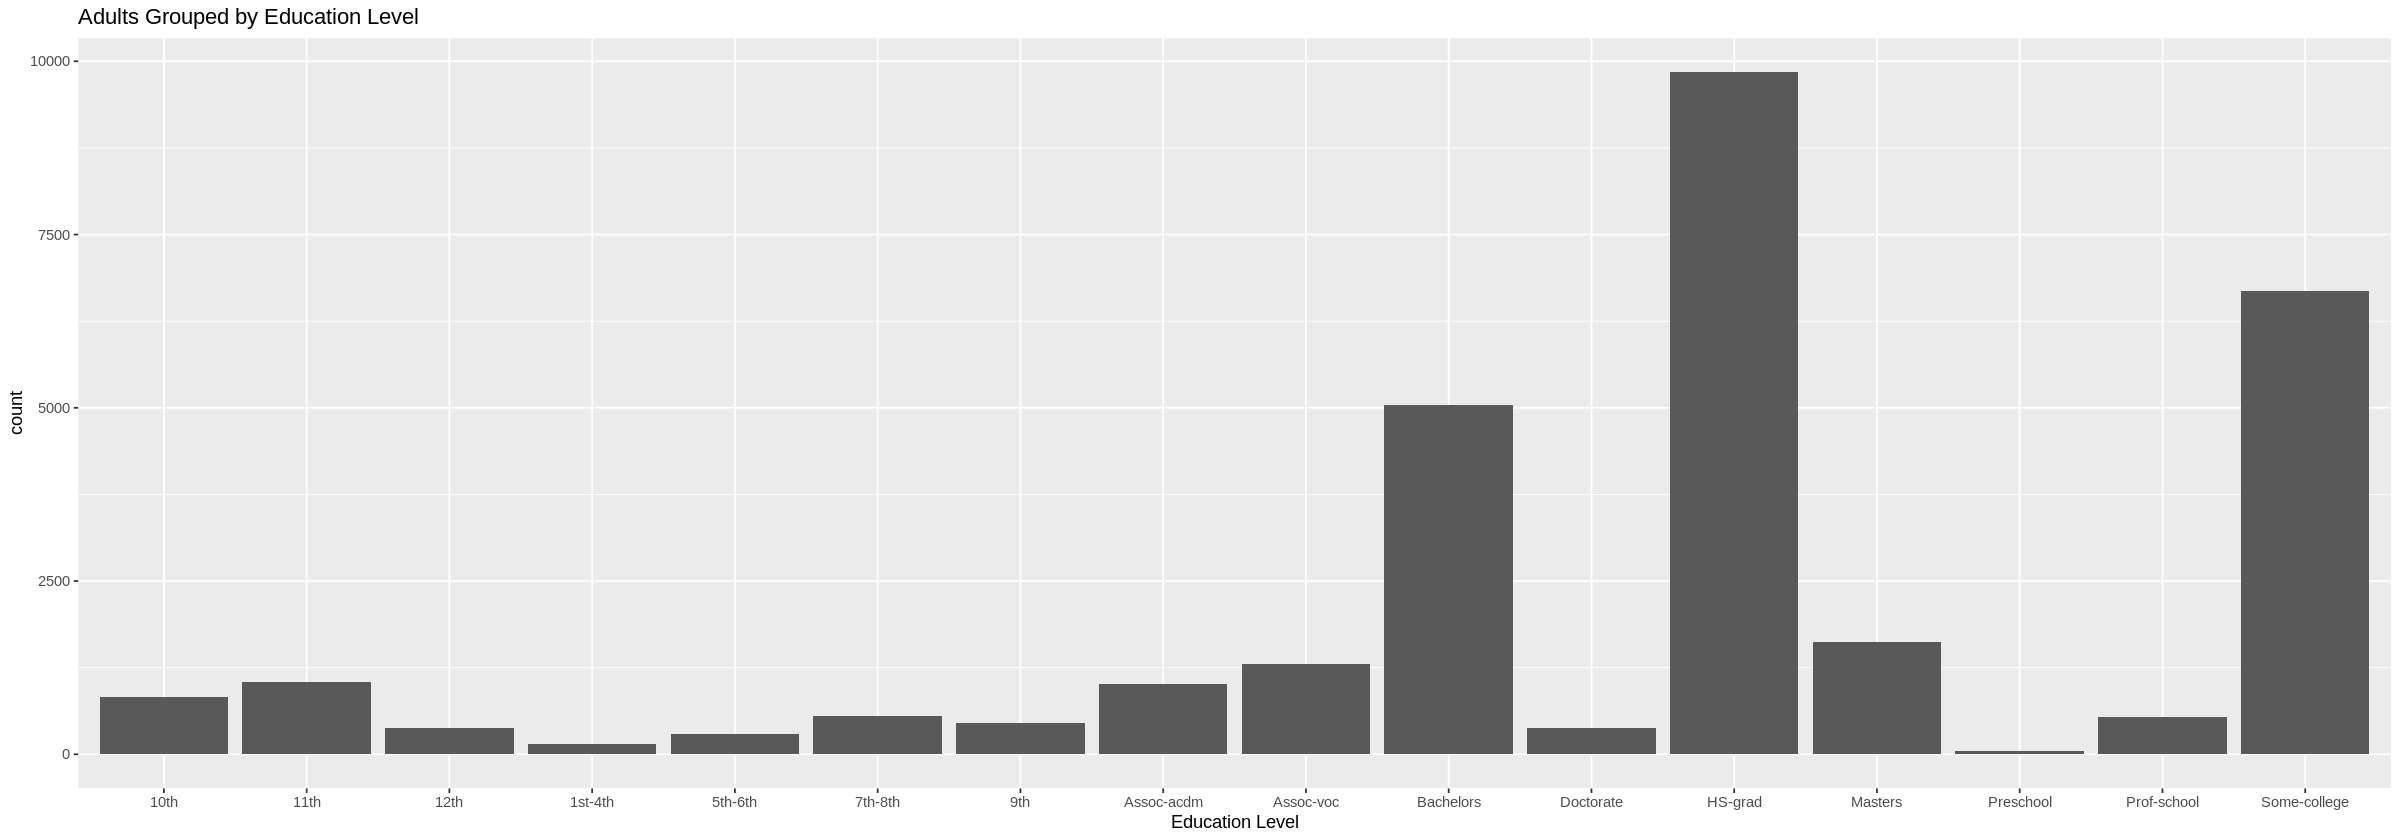

In [9]:
options(repr.plot.width = 20, repr.plot.height = 7)
education_bar <- noques_adult %>% ggplot(aes(x = education)) + geom_bar() +
    xlab("Education Level") + 
    ggtitle("Adults Grouped by Education Level")
education_bar

In [10]:
education_check <- noques_adult[!duplicated(noques_adult$education),] %>% select(education, education.num)
education_check <- education_check[order(education_check$education.num),]
education_check

education,education.num
<fct>,<dbl>
Preschool,1
1st-4th,2
5th-6th,3
7th-8th,4
9th,5
10th,6
11th,7
12th,8
HS-grad,9


In [11]:
noques_adult <- noques_adult %>% mutate(education = case_when(education.num < 3 ~ ",
                        (education.num >= 3 & education.num < 8) ~ ",
                                                             education.num >= 8 & education.num < 10 ~ "=HighSchool",
                                                             education.num >= 10 & education.num < 14 ~ "LowUpper",
                                                             education.num >= 14 ~ "HighUpper"))
noques_adult$education <- as.factor(noques_adult$education)
noques_adult <- noques_adult %>% select(-education.num)
noques_adult$marital.status <- ifelse((noques_adult$marital.status == "Widowed" | 
                                       noques_adult$marital.status == "Divorced" | 
                                       noques_adult$marital.status == "Separated" | 
                                       noques_adult$marital.status == "Never-Married"), "Not Married", "Married")
noques_adult$marital.status <- as.factor(noques_adult$marital.status)

head(noques_adult)

age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
82,Private,132870,=HighSchool,Not Married,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
54,Private,140359,NA,Not Married,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
41,Private,264663,LowUpper,Not Married,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
34,Private,216864,=HighSchool,Not Married,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
38,Private,150601,NA,Not Married,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
74,State-gov,88638,HighUpper,Married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K


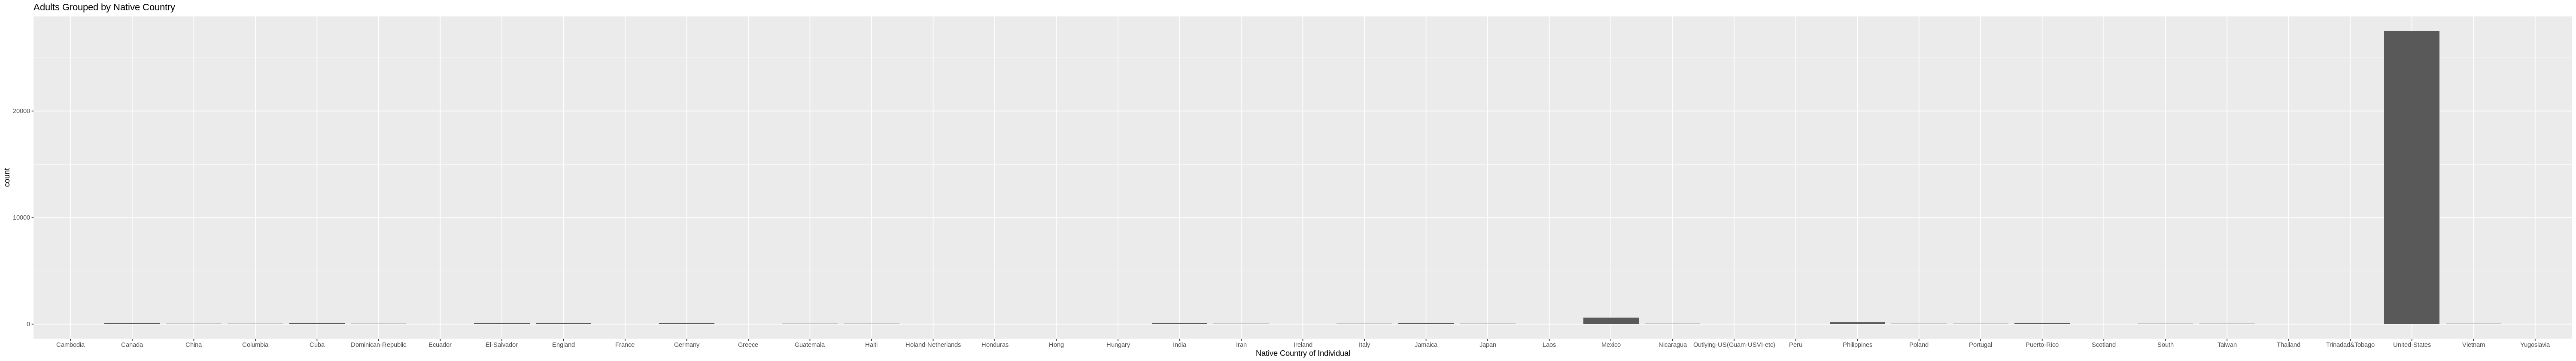

In [12]:
options(repr.plot.width = 50, repr.plot.height = 7)
country_bar <- noques_adult %>% ggplot(aes(x = native.country)) + geom_bar() +
    xlab("Native Country of Individual") + 
    ggtitle("Adults Grouped by Native Country")
country_bar

In [13]:
noques_adult <- noques_adult %>% mutate(native.country = ifelse(native.country == "United-States", "United-States", "Other"))
noques_adult$native.country <- as.factor(noques_adult$native.country)
head(noques_adult)

age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
82,Private,132870,=HighSchool,Not Married,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
54,Private,140359,NA,Not Married,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
41,Private,264663,LowUpper,Not Married,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
34,Private,216864,=HighSchool,Not Married,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
38,Private,150601,NA,Not Married,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
74,State-gov,88638,HighUpper,Married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K


In [14]:
country_check <- noques_adult[!duplicated(noques_adult$native.country),] %>% select(native.country)
country_check

native.country
<fct>
United-States
Other


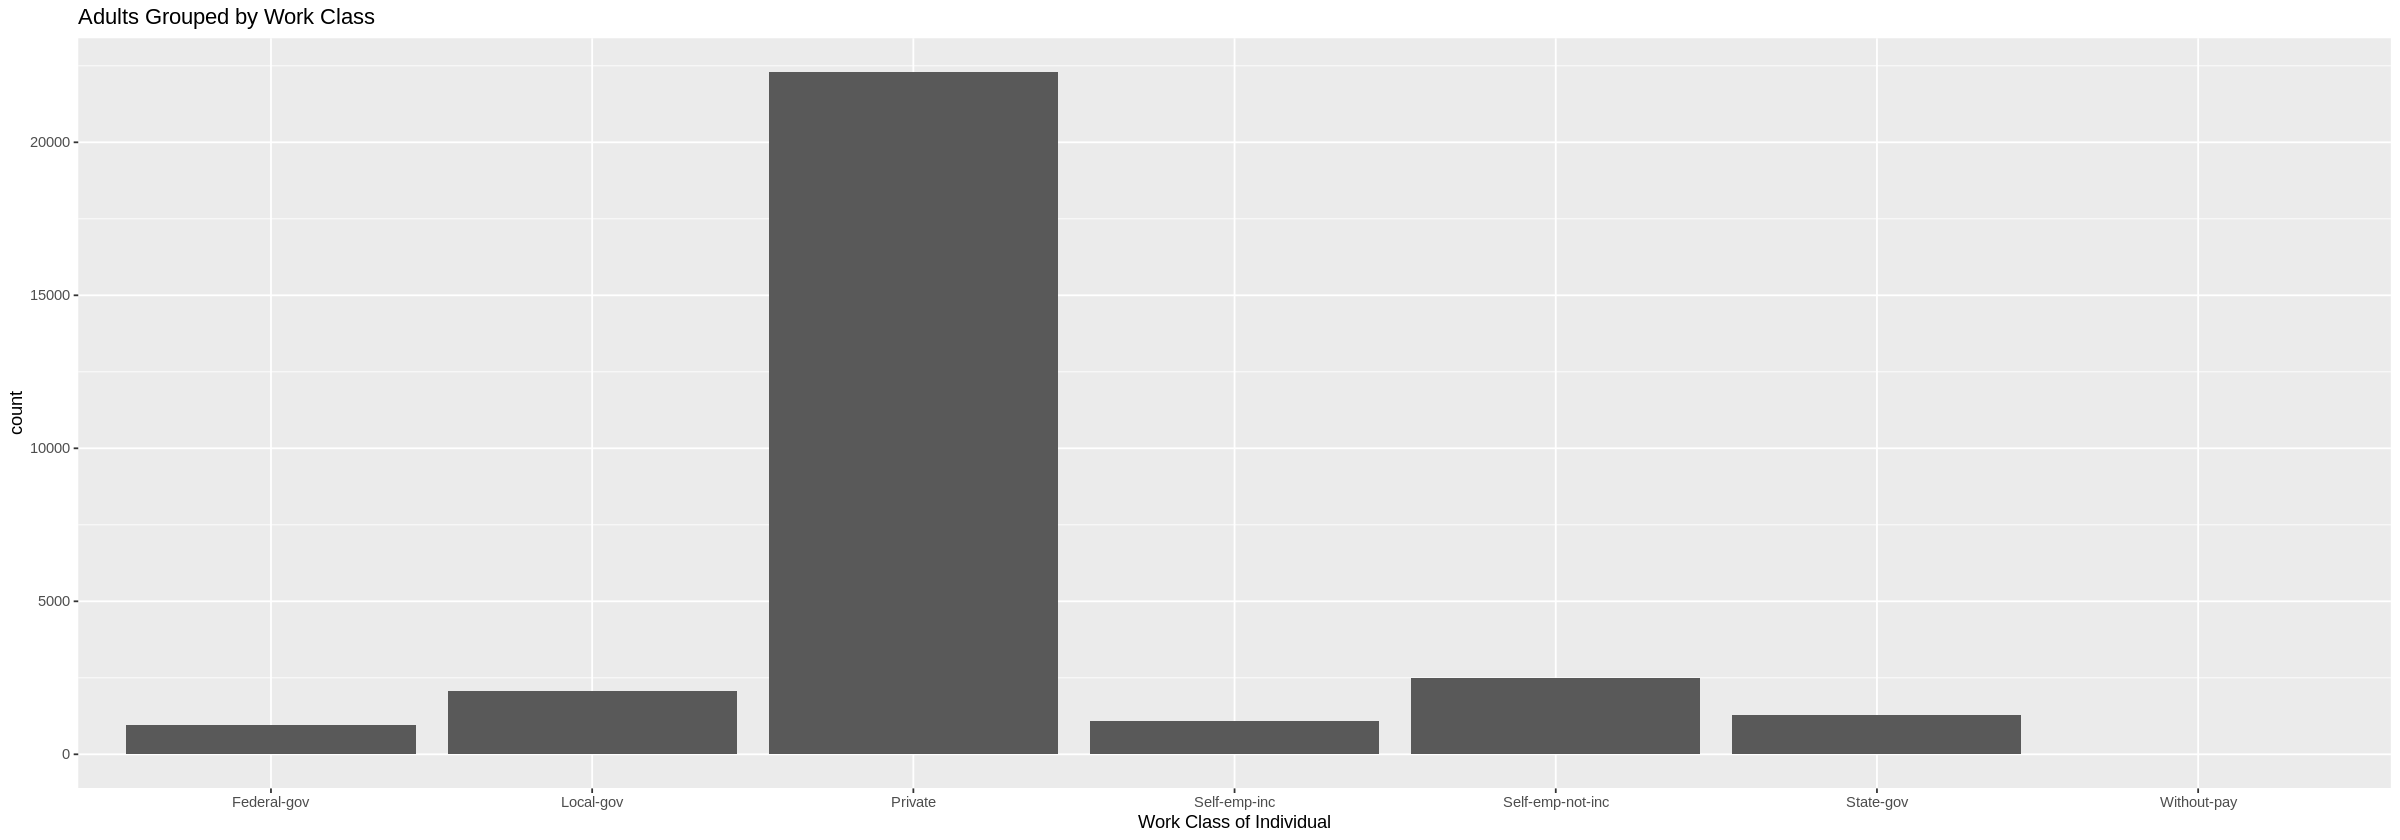

In [15]:
options(repr.plot.width = 20, repr.plot.height = 7)
class_bar <- noques_adult %>% ggplot(aes(x = workclass)) + geom_bar() +
    xlab("Work Class of Individual") + 
    ggtitle("Adults Grouped by Work Class")
class_bar

In [16]:
nrow(noques_adult %>% filter(workclass == "Without-pay"))

[1] 14

In [17]:
summary(noques_adult)

      age                   workclass         fnlwgt       
 Min.   :17.00   Federal-gov     :  943   Min.   :  13769  
 1st Qu.:28.00   Local-gov       : 2067   1st Qu.: 117627  
 Median :37.00   Private         :22286   Median : 178425  
 Mean   :38.44   Self-emp-inc    : 1074   Mean   : 189794  
 3rd Qu.:47.00   Self-emp-not-inc: 2499   3rd Qu.: 237628  
 Max.   :90.00   State-gov       : 1279   Max.   :1484705  
                 Without-pay     :   14                    
                                                                education      
 ,\n                        (education.num >= 3 & education.num < 8) ~ :  196  
 =HighSchool                                                           :10217  
 HighUpper                                                             : 2544  
 LowUpper                                                              :14037  
 NA's                                                                  : 3168  
                                        

In [27]:
options(repr.plot.width = 20, repr.plot.height = 7)
hours_age_plot <- noques_adult %>% ggplot(aes(x = age, y = hours.per.week)) + geom_point()
hours_class_plot <- noques_adult %>% ggplot(aes(x = workclass, y = hours.per.week)) + geom_boxplot()
hours_fnlwgt_plot <- noques_adult %>% ggplot(aes(x = fnlwgt, y = hours.per.week)) + geom_point()
hours_edu_plot <- noques_adult %>% ggplot(aes(x = education, y = hours.per.week)) + geom_boxplot()
hours_marital_plot <- noques_adult %>% ggplot(aes(x = marital.status, y = hours.per.week)) + geom_boxplot()
hours_job_plot <- noques_adult %>% ggplot(aes(x = occupation, y = hours.per.week)) + geom_boxplot()
hours_relat_plot <- noques_adult %>% ggplot(aes(x = relationship, y = hours.per.week)) + geom_boxplot()
hours_race_plot <- noques_adult %>% ggplot(aes(x = race, y = hours.per.week)) + geom_boxplot()
hours_sex_plot <- noques_adult %>% ggplot(aes(x = sex, y = hours.per.week)) + geom_boxplot()
hours_gain_plot <- noques_adult %>% ggplot(aes(x = capital.gain, y = hours.per.week)) + geom_point()
hours_loss_plot <- noques_adult %>% ggplot(aes(x = capital.loss, y = hours.per.week)) + geom_point()
hours_country_plot <- noques_adult %>% ggplot(aes(x = native.country, y = hours.per.week)) + geom_boxplot()
hours_income_plot <- noques_adult %>% ggplot(aes(x = income, y = hours.per.week)) + geom_boxplot()


In [19]:
set.seed(759)
adult300 <- noques_adult %>% sample_n(300)
head(adult300)

age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
20,Private,24896,=HighSchool,Married,Adm-clerical,Wife,White,Female,0,0,20,United-States,<=50K
53,Private,375134,LowUpper,Married,Sales,Husband,White,Male,0,0,60,United-States,>50K
38,Private,130813,=HighSchool,Not Married,Machine-op-inspct,Other-relative,White,Female,0,0,40,United-States,<=50K
21,Private,205759,=HighSchool,Married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
54,Self-emp-not-inc,82551,LowUpper,Married,Tech-support,Other-relative,White,Female,0,0,10,United-States,<=50K
43,Local-gov,196308,=HighSchool,Not Married,Exec-managerial,Unmarried,Amer-Indian-Eskimo,Female,0,0,40,United-States,<=50K


In [21]:
adult300$ID <- rownames(adult300)
train_set <- sample_n(adult300, size = nrow(adult300) * 0.70,
  replace = FALSE
)

test_set <- anti_join(adult300,
  train_set,
  by = "ID"
)

train_set <- select(train_set, -ID)
test_set <- select(test_set, -ID)

head(train_set)
nrow(train_set)

head(test_set)
nrow(test_set)

age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
63,Private,188914,=HighSchool,Not Married,Machine-op-inspct,Other-relative,Black,Female,0,0,40,Other,<=50K
33,Private,213887,=HighSchool,Not Married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
41,Private,155657,NA,Married,Handlers-cleaners,Other-relative,Black,Female,0,0,40,United-States,<=50K
33,Private,221966,LowUpper,Married,Prof-specialty,Not-in-family,White,Male,2202,0,50,United-States,<=50K
47,Private,141511,HighUpper,Married,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
66,Private,174491,=HighSchool,Married,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K


[1] 210

age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
53,Private,375134,LowUpper,Married,Sales,Husband,White,Male,0,0,60,United-States,>50K
44,Private,127592,LowUpper,Married,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K
28,Private,29444,=HighSchool,Married,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
25,Private,130397,NA,Married,Farming-fishing,Unmarried,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
31,Self-emp-not-inc,156890,NA,Married,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
29,Private,133696,LowUpper,Married,Prof-specialty,Not-in-family,White,Male,8614,0,45,United-States,>50K


[1] 90

In [22]:
adult300_full_OLS <- lm(hours.per.week ~ .,
  train_set
)
adult300_full_OLS


Call:
lm(formula = hours.per.week ~ ., data = train_set)

Coefficients:
                (Intercept)                          age  
                  3.723e+01                    1.695e-02  
         workclassLocal-gov             workclassPrivate  
                  4.222e+00                    6.487e+00  
      workclassSelf-emp-inc    workclassSelf-emp-not-inc  
                  1.162e+01                    1.380e+01  
         workclassState-gov                       fnlwgt  
                  4.009e+00                    1.474e-05  
       education=HighSchool           educationHighUpper  
                 -2.778e+00                   -7.129e+00  
          educationLowUpper    marital.statusNot Married  
                 -2.294e+00                    3.735e-01  
     occupationCraft-repair    occupationExec-managerial  
                 -3.576e+00                    3.979e+00  
  occupationFarming-fishing  occupationHandlers-cleaners  
                  4.484e+00               

In [23]:
test_pred_full_OLS <- predict(adult300_full_OLS, newdata = test_set)
head(test_pred_full_OLS)

1        2        3        4        5        6 
51.41463 35.76314 41.18811       NA       NA 51.65355

In [24]:
adult_rmse_models <- tibble(
  Model = "OLS Full Regression",
  R_MSE = rmse(
    preds = test_pred_full_OLS,
    actuals = test_set$hours.per.week
  )
)
adult_rmse_models

Model,R_MSE
<chr>,<dbl>
OLS Full Regression,NA


**Methods: Plans**

Based on the preliminary results, we will use ______________ as explanatory variables to fit and test multiple models. In general, we seek to determine the best MLR model for the data, then use that model to make predictions on the working hours per week of adults in the United States. The dataset we are analysing derives from the Adult Census Bureau database, a reputable source.  <br>

*What methods do we plan on using?* <br>

1. Splitting the dataset into training and testing datasets. Set aside 30% of our dataset to use as the testing dataset.
2. To find the best number of predictors, we will use the forward/backward variable selection method to choose the best predictive model. 
3. To choose the best model, we will estimate MSE using Mallow’s Cp, IC or BIC.
4. Check the performance of the model. If possible, we will add try to use both selection method and compare them.


*What do we expect to achieve?* <br>

We expect to predict a person’s future working hours per week by using our predictive model. For example, given a person’s native country, sex, race, occupation and marital status, we can predict the person’s working hours per week. <br>

*What impact could our results have?* <br>

The findings could provide people to forecast their future working hours per week more accurately by only considering relevant predictor metrics. This model could also be used to perform a preliminary screen on who is likely to work longer. By identifying what variables are relevant to the working hours, people could have a basic idea of their future work. <br>

A future direction could be to analyze the accuracy of the predictor for other areas and datasets, such as do other variables in other dataset affect the number of working hours? <br>



**References**

Kohavi, R. & Becker, B. (1994). Adult Census Income [census report] Retrieved July 21, 2022, from Kaggle. https://www.kaggle.com/datasets/uciml/adult-census-income?search=cite <br>
Dunga, S. H. (2017). a gender and marital status analysis of household income in a low-income township. Studia Universitatis Babeș-Bolyai. Oeconomica, 62(1), 20-30. https://doi.org/10.1515/subboec-2017-0002 <br>
Messenger, J.C., Lee, S. & McCann, D. (2007). Working Time Around the World: Trends in Working Hours, Laws and Policies in a Global Comparative Perspective. Routledge. https://doi.org/10.4324/9780203945216 <br>
Clawson, D. & Gerstel, N. (2014). Unequal Time: Gender, Class and Family in Employment Schedules. Russell Sage Foundation. 